In [1098]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [1080]:
df = pd.read_excel("../data/RWTCd.xls", sheet_name="Data 1", skiprows=2)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)

In [1081]:
print(df.columns)
print(df.head())

Index(['Price'], dtype='object')
            Price
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87


In [1082]:
print(df.isnull().sum())

Price    0
dtype: int64


In [1083]:
print(df.dtypes)

Price    float64
dtype: object


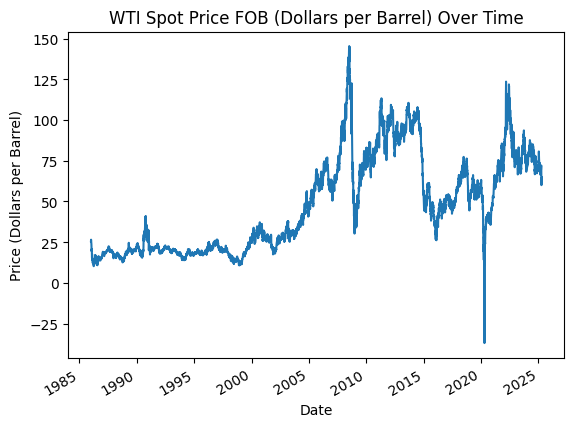

In [1084]:
df['Price'].plot()
plt.title('WTI Spot Price FOB (Dollars per Barrel) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.show()
plt.close()

In [1085]:
# convert data to monthly
monthly_df = df.resample('M').mean()

/var/folders/rz/rmh6_xns41z59zd1wsh6d8pw0000gn/T/ipykernel_3248/1647970859.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').mean()


In [1086]:
monthly_df.head()

,Price
Date,
1986-01-31,22.925455
1986-02-28,15.454737
1986-03-31,12.612500
1986-04-30,12.843636
1986-05-31,15.377619


In [1087]:
# splitting data
train = monthly_df['2015-12-31':'2022-12-31'] # Just taking a sizeable chunk, can use all for more information
test = monthly_df['2022-12-31':]

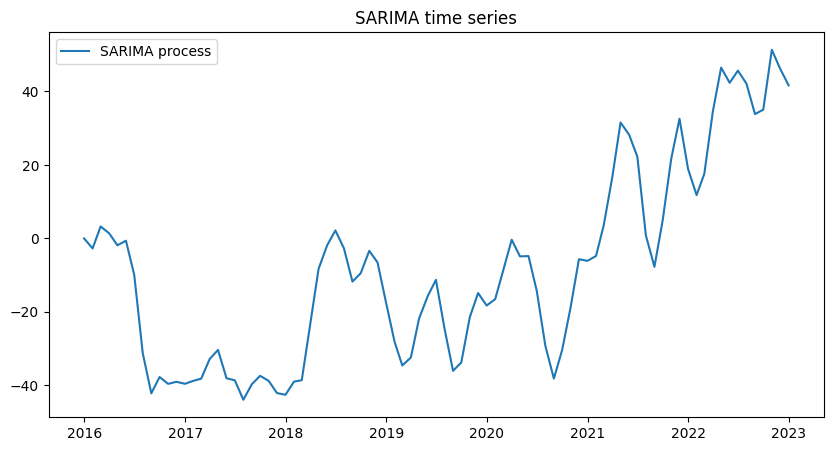

In [1088]:
monthly_df['covid_moment'] = 0
monthly_df.loc['2020-04-30', 'covid_moment'] = 1
covid_moment = monthly_df['covid_moment'].loc[train.index]

model = SARIMAX(train['Price'],
                exog=covid_moment,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

fitted_model = model.fit(disp=False)

n = len(monthly_df['2015-12-31':'2022-12-31'])

sarima_process = fitted_model.simulate(nsimulations=n, initial_state=fitted_model.filter_results.initial_state)

plt.figure(figsize=(10, 5))
plt.plot(sarima_process, label='SARIMA process')
plt.title('SARIMA time series')
plt.legend()
plt.show()
plt.close()

In [1089]:
# get optimal ARIMA model
model = auto_arima(
    sarima_process,
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
)

/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=568.352, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=603.452, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=570.230, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=571.105, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=601.732, Time=0.00 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=569.252, Time=0.08 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=569.205, Time=0.08 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=0.46 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=575.117, Time=0.02 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=571.140, Time=0.19 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=571.202, Time=0.21 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=567.518, Time=0.11 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.14 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=0.44 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=580.243, Time=0.02 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=0.32 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=571.529, Time=0.26 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=566.365, Time=0.08 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=571.831, Time=0.04 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=569.190, Time=0.04 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=0.30 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=580.786, Time=0.02 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=572.540, Time=0.12 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=570.623, Time=0.12 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=564.698, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=568.190, Time=0.03 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.37 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=579.519, Time=0.01 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=571.608, Time=0.08 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=569.375, Time=0.08 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=579.864, Time=0.05 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=566.525, Time=0.08 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=567.937, Time=0.06 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=562.747, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=569.178, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=566.219, Time=0.02 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12]             : AIC=inf, Time=0.22 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=577.660, Time=0.01 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=569.646, Time=0.06 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=567.397, Time=0.05 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=577.910, Time=0.03 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=564.568, Time=0.07 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=564.404, Time=0.06 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12]             : AIC=565.958, Time=0.05 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12]             : AIC=inf, Time=0.34 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 9.283 seconds


In [1090]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -277.373
Date:                            Sat, 26 Apr 2025   AIC                            562.747
Time:                                    03:24:02   BIC                            572.470
Sample:                                12-31-2015   HQIC                           566.655
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4673      0.127      3.673      0.000       0.218       0.717
ar.S.L12       0.9760      0.103   

In [1091]:
n_periods = len(monthly_df['2023-01-01':'2025-4-21'])
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = monthly_df['2023-01-01':'2025-12-31'].index[:n_periods]

/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [1092]:
print(conf_int[0:5])

[[30.67697808 55.11094331]
 [24.11608968 67.48509691]
 [25.18626808 81.44213818]
 [25.86782121 92.56546025]
 [20.91709099 96.62988505]]


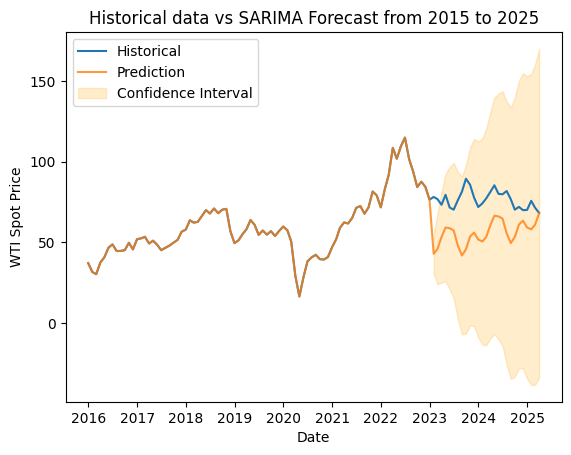

In [1093]:
traj_index = monthly_df['2015-12-31':'2022-12-31'].index.append(forecast_index)
traj = pd.concat([monthly_df['2015-12-31':'2022-12-31']['Price'], forecast])
plt.plot(monthly_df['2015-12-31':'2025-4-21'].index, monthly_df['2015-12-31':'2025-4-21']['Price'], label='Historical')
plt.plot(traj_index, traj, label='Prediction', alpha=0.8)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], label='Confidence Interval', color='orange', alpha=0.2)
plt.title('Historical data vs SARIMA Forecast from 2015 to 2025')
plt.xlabel('Date')
plt.ylabel('WTI Spot Price')
plt.legend()
plt.show()

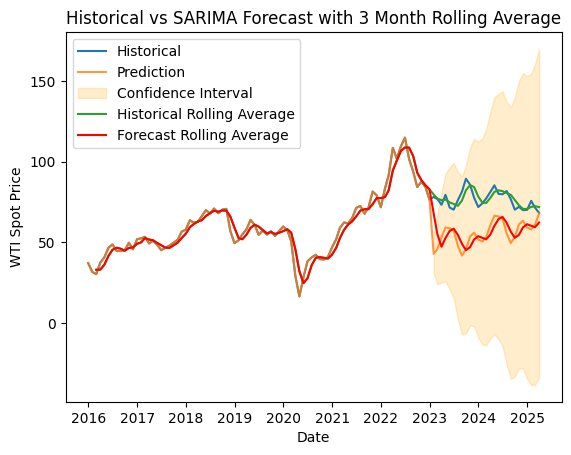

In [1094]:
historical_rolling_avg = monthly_df['2015-12-31':'2025-4-21']['Price'].rolling(window=3).mean()
forecast_rolling_avg = traj.rolling(window=3).mean()
plt.plot(monthly_df['2015-12-31':'2025-4-21'].index, monthly_df['2015-12-31':'2025-4-21']['Price'], label='Historical', alpha=1)
plt.plot(traj_index, traj, label='Prediction', alpha=0.8)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], label='Confidence Interval', color='orange', alpha=0.2)

plt.plot(monthly_df['2015-12-31':'2025-4-21'].index, historical_rolling_avg, label='Historical Rolling Average')
plt.plot(traj_index, forecast_rolling_avg, label='Forecast Rolling Average', color='red')

plt.title('Historical vs SARIMA Forecast with 3 Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('WTI Spot Price')
plt.legend()
plt.show()

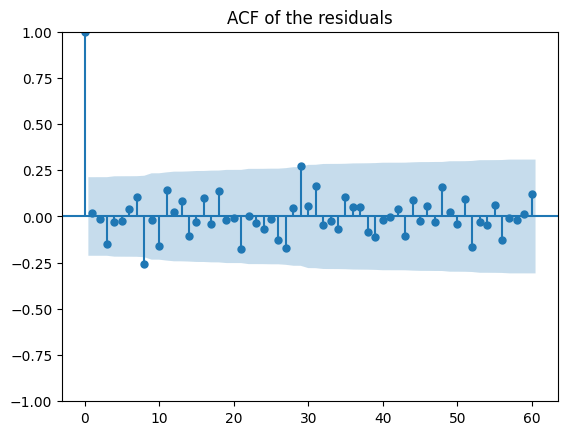

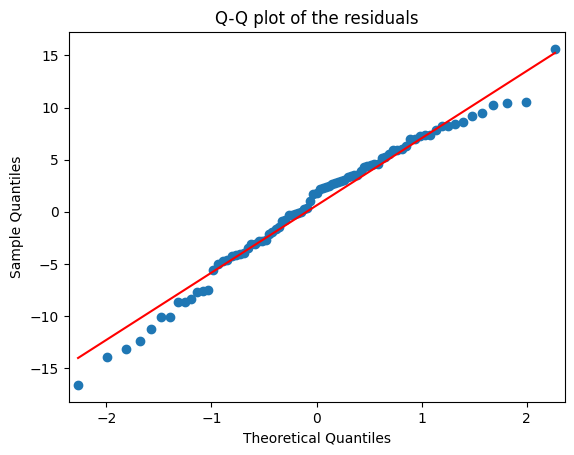

In [1095]:
residuals = model.resid()

plot_acf(residuals, lags=60)
plt.title('ACF of the residuals')
plt.show()


sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of the residuals')
plt.show()

In [1096]:
def compute_asian(series, start_month, end_month):
  return series[start_month:end_month].mean()

In [1099]:
asian_price_forecast = compute_asian(traj, '2023-01', '2023-03')
asian_price_actual = compute_asian(monthly_df['Price'], '2023-01', '2023-03')

print(f"Asian option payout (forecast): {asian_price_forecast:.2f}")
print(f"Asian option payout (actual): {asian_price_actual:.2f}")
print(f"Difference: {np.abs(asian_price_forecast - asian_price_actual):.2f}")

Asian option payout (forecast): 47.34
Asian option payout (actual): 76.08
Difference: 28.74
